In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pickle

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm

In [4]:
import crflux.models as pm
import mceq_underground_helpers as mh

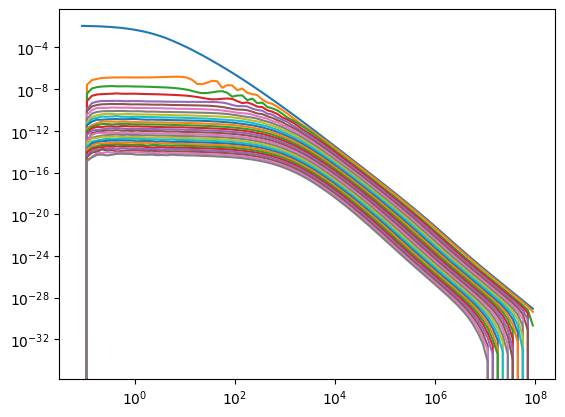

In [5]:
plt.loglog(mh.mute_energies, mh.flux(0., 0.,"daemonflux"))
for id, X in enumerate(mh.slant_depths[:-1]):
    plt.loglog(mh.mute_energies, mh.flux(X, 0., "daemonflux"))

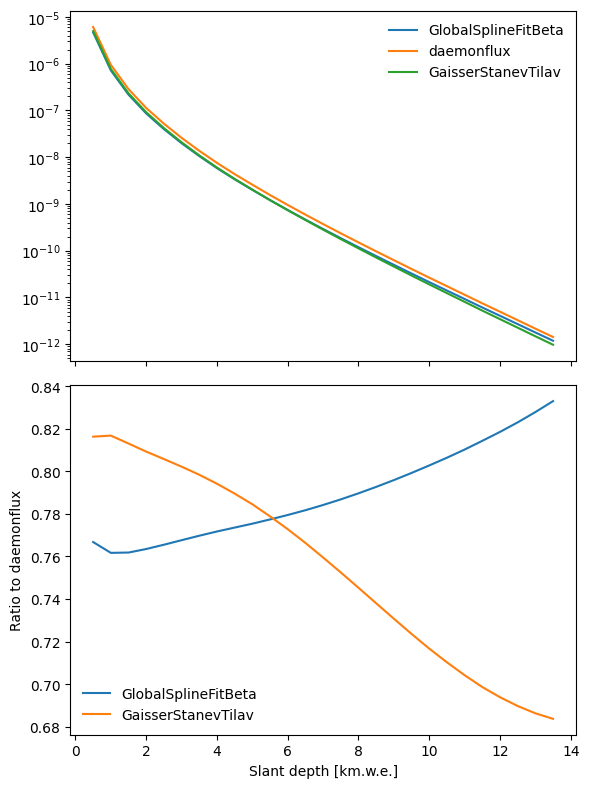

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(6, 8))

ax1.semilogy(
    mh.slant_depths[:-1],
    mh.rates(mh.slant_depths[:-1], 0.0, "GSF"),
    label="GlobalSplineFitBeta",
)
ax1.semilogy(
    mh.slant_depths[:-1],
    mh.rates(mh.slant_depths[:-1], 0.0, "daemonflux"),
    label="daemonflux",
)
ax1.semilogy(
    mh.slant_depths[:-1],
    mh.rates(mh.slant_depths[:-1], 0.0, "GST"),
    label="GaisserStanevTilav",
)
ax1.legend(frameon=False)

ax2.plot(
    mh.slant_depths[:-1],
    mh.rates(mh.slant_depths[:-1], 0.0, "GSF")
    / mh.rates(mh.slant_depths[:-1], 0.0, "daemonflux"),
    label="GlobalSplineFitBeta",
)
ax2.plot(
    mh.slant_depths[:-1],
    mh.rates(mh.slant_depths[:-1], 0.0, "GST")
    / mh.rates(mh.slant_depths[:-1], 0.0, "daemonflux"),
    label="GaisserStanevTilav",
)
ax2.set_xlabel("Slant depth [km.w.e.]")
ax2.set_ylabel("Ratio to daemonflux")
ax2.legend(frameon=False)

plt.tight_layout()

In [7]:
cnorm = Normalize(min(mh.slant_depths-1), max(mh.slant_depths))
s_m = cm.ScalarMappable(cmap=cm.magma_r, norm=cnorm)
s_m.set_array([])

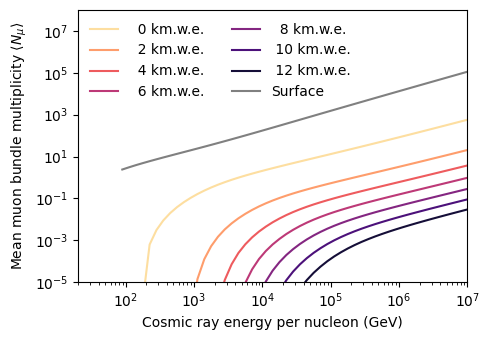

In [8]:
plt.figure(figsize=(5.0, 3.5))
angle = 0.0
for ia, X in enumerate(mh.slant_depths[:-1:4]):
    l = plt.loglog(
        mh.cr_grid,
        [mh.mean_mult(X, angle, "yields", ei) for ei, e_cr in enumerate(mh.cr_grid)],
        c=s_m.to_rgba(X),
        label=r"{0:3.0f} km.w.e.".format(X),
    )[0]
plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(0., angle, "yields", ei) for ei, e_cr in enumerate(mh.cr_grid)],
    color="gray",
    label=r"Surface".format(X),
)[0]
plt.ylim(1e-5, 1e8)
plt.xlim(20.0, 1e7)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon bundle multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

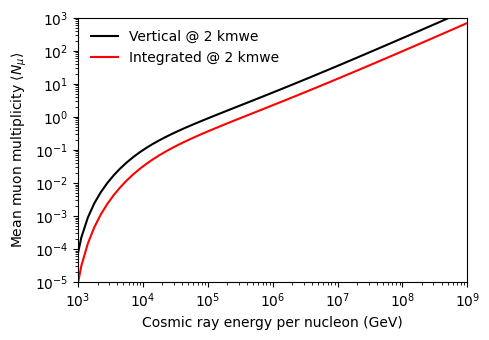

In [16]:
plt.figure(figsize=(5.0, 3.5))
X = 2
plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(X, 0.0, "yields", ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="k",
    label=f"Vertical @ {X} kmwe",
)[0]

plt.loglog(
    mh.cr_grid,
    [mh.integrated_mean_mult(X, "yields", ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="r",
    label=f"Integrated @ {X} kmwe",
)[0]

# plt.loglog(cr_grid,[surf_mean_mult(ground_muspec_prim_energies[ei]) for ei, e_cr in enumerate(cr_grid)],
#            color='gray', label=r'Surface'.format(d0/d0cosa))[0]
plt.ylim(1e-5, 1e3)
plt.xlim(1e3, 1e9)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=1)
plt.tight_layout()
# nbu.save('STRAW_muon_multiplicity')

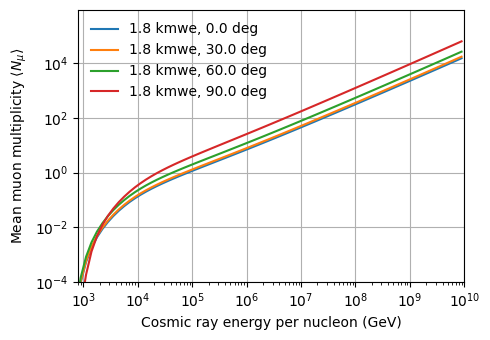

In [32]:
plt.figure(figsize=(5.0, 3.5))
X = 1.8  # kmwe
for angle in [0.0, 30.0, 60.0, 90.0]:
    plt.loglog(
        mh.cr_grid,
        [mh.mean_mult(X, angle, "yields", ei) for ei, e_cr in enumerate(mh.cr_grid)],
        label=f"{X} kmwe, {angle} deg",
    )[0]

plt.xlim(8e2, 1e10)
plt.ylim(1e-4, )
plt.grid()
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=1)
plt.tight_layout()


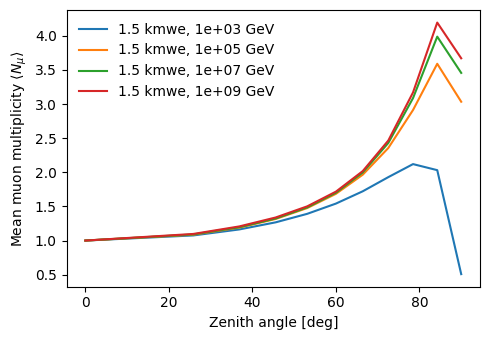

In [43]:
plt.figure(figsize=(5.0, 3.5))
X = 1.5  # kmwe
for ie in [10, 30, 50, 70]:
    ie += 1
    plt.plot(
        mh.angles,
        [mh.mean_mult(X, angle, "yields", ie)/mh.mean_mult(X, 0., "yields", ie) for angle in mh.angles],
        label=f"{X} kmwe, {mh.cr_grid[ie]:.0e} GeV",
    )[0]

plt.xlabel("Zenith angle [deg]")
plt.ylabel(r"Mean muon multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=1)
plt.tight_layout()


In [ ]:
plt.figure(figsize=(5.0, 3.5))
X = 2
plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(X, 0.0, "yields", ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="k",
    label=f"Vertical @ {X} kmwe",
)[0]

plt.loglog(
    mh.cr_grid,
    [mh.integrated_mean_mult(X, "yields", ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="r",
    label=f"Integrated @ {X} kmwe",
)[0]

# plt.loglog(cr_grid,[surf_mean_mult(ground_muspec_prim_energies[ei]) for ei, e_cr in enumerate(cr_grid)],
#            color='gray', label=r'Surface'.format(d0/d0cosa))[0]
plt.ylim(1e-5, 1e3)
plt.xlim(1e3, 1e9)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=1)
plt.tight_layout()
# nbu.save('STRAW_muon_multiplicity')

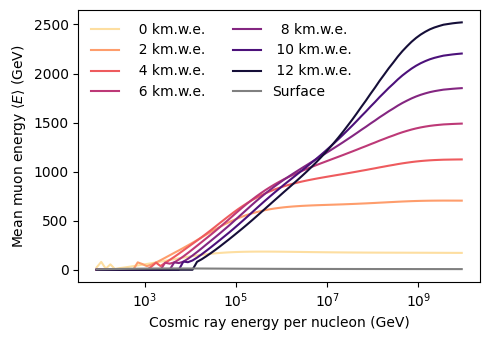

In [10]:
plt.figure(figsize=(5.0, 3.5))
for ia, X in enumerate(mh.slant_depths[:-1:4]):
    plt.semilogx(
        mh.cr_grid,
        [mh.mean_e(X, 0.0, ei, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
        c=s_m.to_rgba(X),
        label=r"{0:3.0f} km.w.e.".format(X),
    )[0]
plt.semilogx(
    mh.cr_grid,
    [mh.mean_e(0.0, 0.0, ei, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
    color="gray",
    label=r"Surface",
)[0]
# plt.ylim(1e-2,1e7)
# plt.xlim(200.,1e7)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon energy $\langle E \rangle$ (GeV)")
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

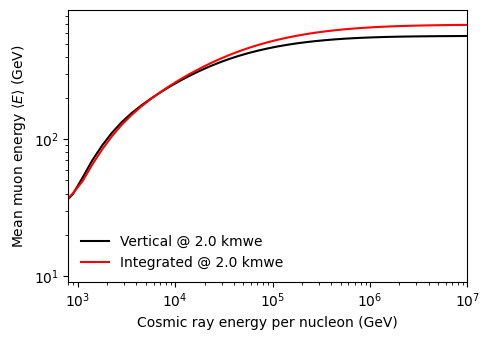

In [11]:
plt.figure(figsize=(5.0, 3.5))
X = 2.0  # kmwe
plt.loglog(
    mh.cr_grid,
    [mh.mean_e(X, 0.0, ei, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
    c="k",
    label=f"Vertical @ {X} kmwe",
)[0]
plt.loglog(
    mh.cr_grid,
    [mh.integrated_mean_e(X, ei, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
    c="r",
    label=f"Integrated @ {X} kmwe",
)[0]



plt.xlim(8e2, 1e7)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon energy $\langle E \rangle$ (GeV)")
plt.legend(frameon=False, ncol=1)
plt.tight_layout()

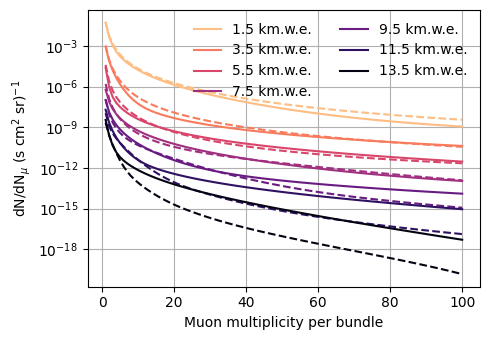

In [12]:
plt.figure(figsize=(5.0, 3.5))
angle = 0.0
for X in mh.slant_depths[2:-1:4]:
    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GaisserStanevTilav("4-gen"),
            norm=False,
        )
        / mh.rates(X, angle, "GST"),
        c=s_m.to_rgba(X),
        label=r"{0:3.1f} km.w.e.".format(X),
    )[0]
    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),
            norm=False,
        )
        / mh.rates(X, angle, "GSF"),
        c=s_m.to_rgba(X),
        linestyle="--",
    )[0]
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
plt.legend(frameon=False, ncol=2)
# plt.ylim(1e-11, 8e-5)
# plt.xlim(4,100)
plt.grid()
plt.tight_layout()

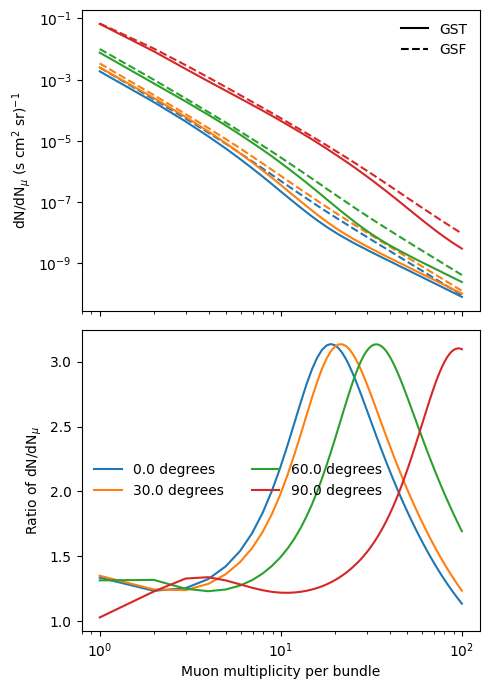

In [13]:
angle_list = [0.0, 30.0, 60.0, 90.0]
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 7), sharex=True)
X = 3.

lines = []  # create a list to store the Line2D objects
for angle in angle_list:
    color = ax1.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            angle,
            pm.GaisserStanevTilav("4-gen"),
            norm=False,
        )
        / mh.rates(X, angle, "GST"),
        label=f"{angle} degrees",
    )[0].get_color()
    ax1.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            angle,
            pm.GlobalSplineFitBeta(),
            norm=False,
        )
        / mh.rates(X, angle, "GSF"),
        linestyle="--",
        color=color,  # pass the same color to both calls
    )
    ax2.semilogx(
        mh.n_mu_vec,
        (
            mh.mult_dist(
                X,
                angle,
                pm.GlobalSplineFitBeta(),
                norm=False,
            )
            / mh.mult_dist(X, angle, pm.GaisserStanevTilav("4-gen"), norm=False)
            / mh.rates(X, angle, "GSF")
            * mh.rates(X, angle, "GST")
        ),
        label=f"{angle} degrees",
        color=color,
    )
# add the Line2D objects to the list
lines.append(mlines.Line2D([], [], color='k', linestyle="-", label="GST"))
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="GSF"))

# ax1.set_xlabel("Muon multiplicity per bundle")
ax1.set_ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
ax1.legend(frameon=False, ncol=2)
# ax1.grid()

ax2.set_xlabel("Muon multiplicity per bundle")
ax2.set_ylabel(r"Ratio of dN/dN$_\mu$")
ax2.legend(frameon=False, ncol=2)
# ax2.grid()

# add the custom legend to the plot
ax1.legend(handles=lines, frameon=False, loc="upper right")
plt.tight_layout()

In [14]:
for ia, d0cosa in enumerate(cosa):
    if ia in [1, 3, 4, 6, 9]:
        continue
    #     print(d0cosa,ia)
    d = d0 / d0cosa
    plt.loglog(
        n_mu_vec,
        get_mult_dist(ia, pm.GaisserStanevTilav("4-gen"), norm=False)
        / get_mult_dist(ia, pm.GlobalSplineFitBeta(), norm=False),
        c=s_m.to_rgba(d),
        label=r"${0:3.1f}^\circ$".format(angles[ia]),
    )[0]
#     plt.loglog(n_mu_vec,
#         get_mult_dist(ia,pm.GlobalSplineFitBeta(), norm=False),
#                c=s_m.to_rgba(d),ls='--')
plt.xlabel("Muon multiplicity per bundle/and angular bin")
plt.ylabel(r"Ratio of bundle mult. GST-4/GSF at $h=3$ km.w.e.")
plt.legend(frameon=False, ncol=2)
# plt.grid()
plt.tight_layout()
save("bundle_multiplicity_ratio_angles")

NameError: name 'cosa' is not defined

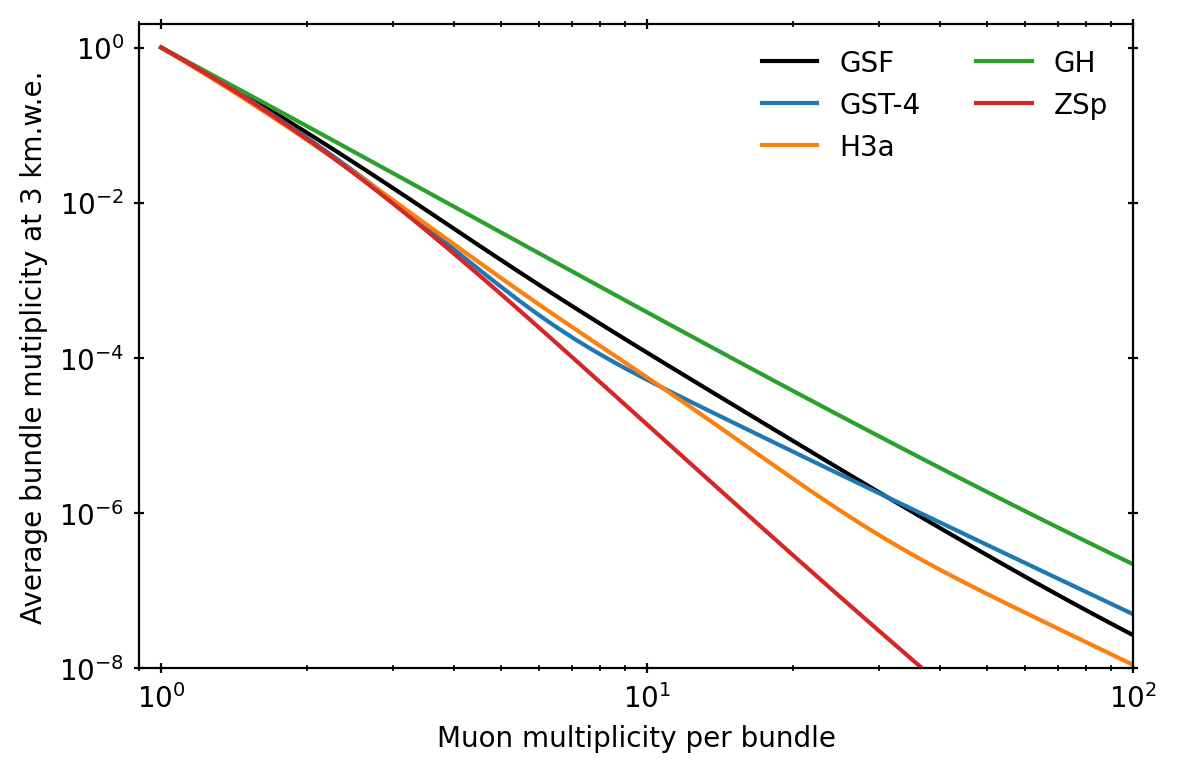

In [ ]:
plt.loglog(
    n_mu_vec, get_integrated_mult_dist(pm.GlobalSplineFitBeta()), label="GSF", color="k"
)
plt.loglog(
    n_mu_vec, get_integrated_mult_dist(pm.GaisserStanevTilav("4-gen")), label="GST-4"
)
plt.loglog(n_mu_vec, get_integrated_mult_dist(pm.HillasGaisser2012("H3a")), label="H3a")
plt.loglog(n_mu_vec, get_integrated_mult_dist(pm.GaisserHonda()), label="GH")
plt.loglog(
    n_mu_vec, get_integrated_mult_dist(pm.ZatsepinSokolskaya("pamela")), label="ZSp"
)
plt.gca().tick_params(
    axis="both", which="both", right=True, top=True, direction="inout"
)
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"Average bundle mutiplicity at 3 km.w.e.")
plt.legend(frameon=False, ncol=2)
plt.ylim(1e-8, 2e0)
plt.xlim(9e-1, 1e2)
plt.tight_layout()
save("Norm_bundle_multiplicity_3kmwe_sib23d.")

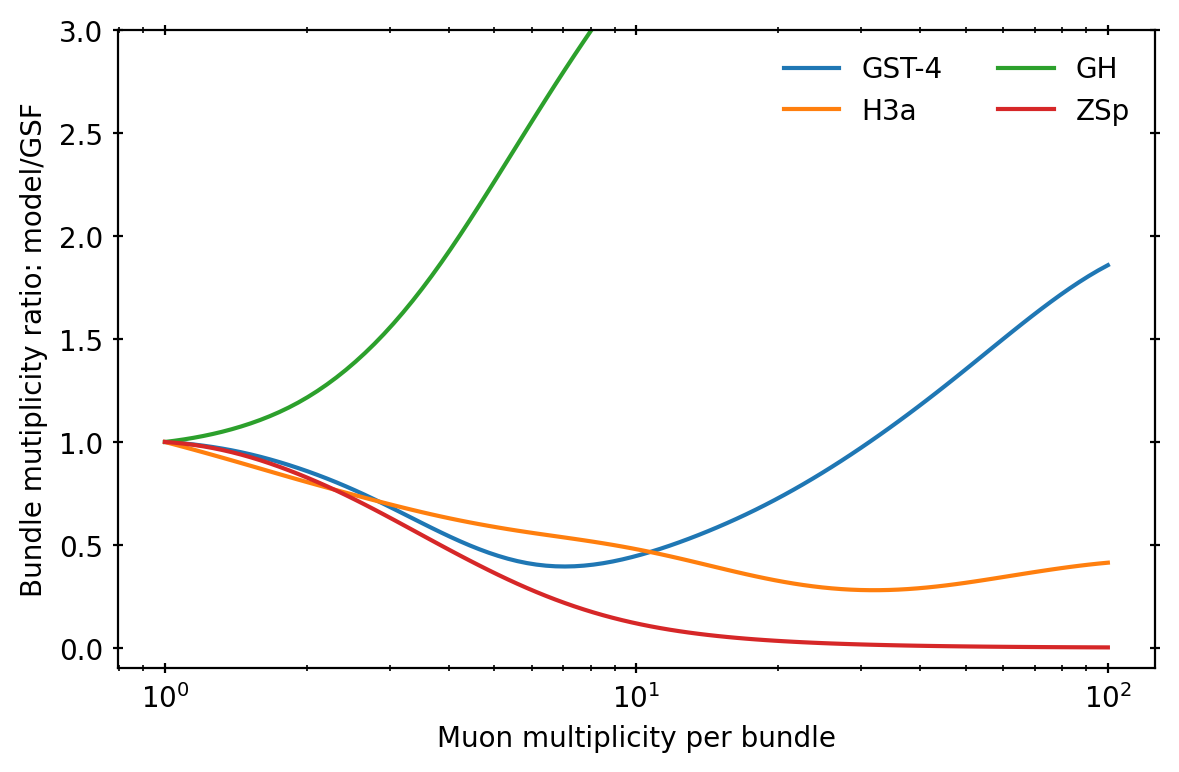

In [ ]:
plt.semilogx(
    n_mu_vec,
    get_integrated_mult_dist(pm.GaisserStanevTilav("4-gen"), norm=False)
    / get_integrated_mult_dist(pm.GlobalSplineFitBeta(), norm=False),
    label=r"GST-4".format(d0 / d0cosa),
)
plt.semilogx(
    n_mu_vec,
    get_integrated_mult_dist(pm.HillasGaisser2012("H3a"), norm=False)
    / get_integrated_mult_dist(pm.GlobalSplineFitBeta(), norm=False),
    label=r"H3a",
)
plt.semilogx(
    n_mu_vec,
    get_integrated_mult_dist(pm.GaisserHonda(None), norm=False)
    / get_integrated_mult_dist(pm.GlobalSplineFitBeta(), norm=False),
    label="GH",
)
plt.semilogx(
    n_mu_vec,
    get_integrated_mult_dist(pm.ZatsepinSokolskaya(), norm=False)
    / get_integrated_mult_dist(pm.GlobalSplineFitBeta(), norm=False),
    label="ZSp",
)
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"Bundle mutiplicity ratio: model/GSF")
plt.legend(frameon=False, ncol=2)
plt.ylim(-0.1, 3)
plt.gca().tick_params(
    axis="both", which="both", right=True, top=True, direction="inout"
)
plt.tight_layout()
save("ratio_GSF_bundle_multiplicity_3kmwe_sib23d")